# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [57]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [58]:
df

,Notes,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,Texas,48.0,"Jan 01, 1979",1979/01/01,29
1,NaN,Texas,48.0,"Jan 02, 1979",1979/01/02,31
2,NaN,Texas,48.0,"Jan 03, 1979",1979/01/03,42
3,NaN,Texas,48.0,"Jan 04, 1979",1979/01/04,47
4,NaN,Texas,48.0,"Jan 05, 1979",1979/01/05,47
...,...,...,...,...,...,...
12050,NaN,Texas,48.0,"Dec 29, 2011",2011/12/29,67
12051,NaN,Texas,48.0,"Dec 30, 2011",2011/12/30,69
12052,NaN,Texas,48.0,"Dec 31, 2011",2011/12/31,73
12053,Total,Texas,48.0,NaN,NaN,78


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [59]:
df[df["Notes"].str.contains("Total")==False]

,Notes,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)


In [60]:
df.drop('Notes', axis=1, inplace=True)
df

,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,Texas,48.0,"Jan 01, 1979",1979/01/01,29
1,Texas,48.0,"Jan 02, 1979",1979/01/02,31
2,Texas,48.0,"Jan 03, 1979",1979/01/03,42
3,Texas,48.0,"Jan 04, 1979",1979/01/04,47
4,Texas,48.0,"Jan 05, 1979",1979/01/05,47
...,...,...,...,...,...
12050,Texas,48.0,"Dec 29, 2011",2011/12/29,67
12051,Texas,48.0,"Dec 30, 2011",2011/12/30,69
12052,Texas,48.0,"Dec 31, 2011",2011/12/31,73
12053,Texas,48.0,NaN,NaN,78


>3) Make a column called Date that is in the pandas datetime format

In [61]:
df['Date'] = pd.to_datetime(df['Month Day, Year'], errors='raise')
df

,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,Texas,48.0,"Jan 01, 1979",1979/01/01,29,1979-01-01
1,Texas,48.0,"Jan 02, 1979",1979/01/02,31,1979-01-02
2,Texas,48.0,"Jan 03, 1979",1979/01/03,42,1979-01-03
3,Texas,48.0,"Jan 04, 1979",1979/01/04,47,1979-01-04
4,Texas,48.0,"Jan 05, 1979",1979/01/05,47,1979-01-05
...,...,...,...,...,...,...
12050,Texas,48.0,"Dec 29, 2011",2011/12/29,67,2011-12-29
12051,Texas,48.0,"Dec 30, 2011",2011/12/30,69,2011-12-30
12052,Texas,48.0,"Dec 31, 2011",2011/12/31,73,2011-12-31
12053,Texas,48.0,NaN,NaN,78,NaT


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [62]:
df[['Year', 'Month', 'Day']] = df['Month Day, Year Code'].str.split("/", expand = True)

In [63]:
df=df[:-1]

In [64]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

/tmp/ipykernel_13427/1970195628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='DateInt', ylabel='Avg Daily Max Air Temperature (F)'>

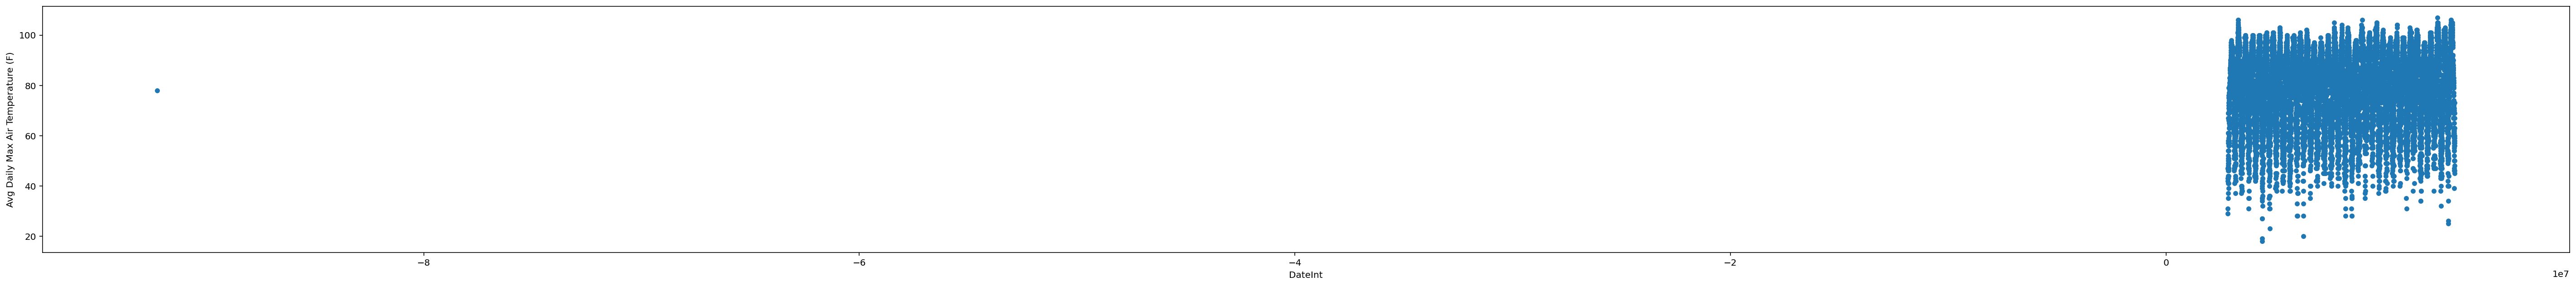

In [65]:
df.plot.scatter(x = 'DateInt', y = 'Avg Daily Max Air Temperature (F)', figsize=(50,5)) 

>5) Describe your plot.

In [66]:
#my plot oscillates consistently 

### Adding colors for our graph

In [67]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

In [68]:
c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

In [69]:
df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

ValueError: cannot convert float NaN to integer

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

In [ ]:
df.plot.scatter(x = 'DateInt', y = 'Avg Daily Max Air Temperature (F)', figsize=(50,5), c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [ ]:
subset = df[(pd.datetime(1980,3,20)<=df['Date'])&((df['Date']<pd.datetime(1980,9,20)))]
subset.head()

>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

In [ ]:
plt.scatter(subset['Date'], subset['Avg Daily Max Air Temperature (F)'], c=df['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [ ]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [ ]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [ ]:
Y_pred = lin_reg(X,Y)

In [ ]:
plt.scatter(subset['Date'], subset['Avg Daily Max Air Temperature (F)'], c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [ ]:
#slope = 0.0001597976272780264 
#y-int = -437.3736009708925

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [ ]:
print([min(Y_pred), max(Y_pred)])
# [min,max]

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [70]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values

In [71]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [72]:
Y_pred = lin_reg(X,Y)

2.8202966926155134e-07 75.86998069950653


In [73]:
df.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',figsize(50,5),c=df['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='green') # best fit line
plt.show()

SyntaxError: positional argument follows keyword argument (3201692553.py, line 1)

>12) Is the slope positive or negative? What do you think that means?

In [ ]:
#positive. temperatures generally rise as the year goes on.